<button data-commandLinker-command="progressivis:cleanup_and_run" data-commandlinker-args='{"index": 1}' href="#" class='progressivis-cleanup-and-run-btn'>Run ProgressiVis</button>

In [1]:
from ipyprogressivis.widgets.chaining.constructor import Constructor
from ipyprogressivis.widgets.chaining.utils import create_root, get_header
from ipyprogressivis.widgets.chaining.custom import *
header = get_header()
display(header.talker)
display(header.backup)
_ = header.constructor
with header.modules_out:
    display(header.board)
with header.widgets_out:
    display(header.manager)
header.talker.labcommand("notebook:hide-cell-code")
%reload_ext ipyprogressivis.magics
create_root(header.backup)

In [3]:
# progressivis-snippet
import tempfile
from pathlib import Path
from progressivis.datasets.wget import wget_file
from progressivis import Sink, ArrowBatchLoader
import duckdb
import pyarrow.parquet as pq
td = tempfile.TemporaryDirectory()
taxis_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-05.parquet"
taxis_file = Path(td.name) / "yellow_tripdata_2015-05.parquet"
zones_url = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv"
zones_file = Path(td.name) / "taxi_zone_lookup.csv"
SQL = (
    f"SELECT tx.tpep_pickup_datetime, tx.tpep_dropoff_datetime, tx.passenger_count, zn.Borough"
    f" FROM read_parquet('{taxis_file}') tx, read_csv('{zones_file}') zn"
    " WHERE tx.PULocationID=zn.LocationID"
)
try:
    wget_file(url=taxis_url, filename=taxis_file)
    wget_file(url=zones_url, filename=zones_file)
    con = duckdb.connect(database=":memory:")
    n_rows = pq.ParquetFile(taxis_file).metadata.num_rows
    con.execute(SQL)
    reader = con.fetch_record_batch(1000)
finally:
    td.cleanup()

@register_snippet
def taxis_zones(input_module, input_slot, columns):
    scheduler = input_module.scheduler()
    with scheduler:
        data =  ArrowBatchLoader(reader=reader, n_rows=n_rows, scheduler=scheduler)
        sink = Sink(scheduler=scheduler)
        sink.input.inp = data.output.result
    return SnippetResult(output_module=data, output_slot="result")

## root

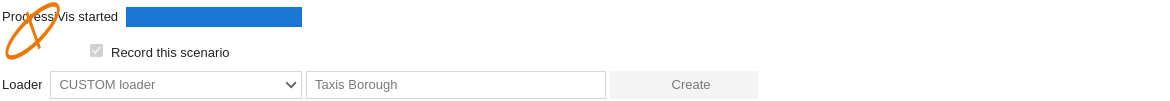

Starting scheduler
# Scheduler added module(s): ['sink_1', 'variable_1']


In [2]:
# do not run this cell
display(header.constructor)
header.constructor.start_scheduler()
header.talker.labcommand('notebook:hide-cell-code')

## Taxis Borough

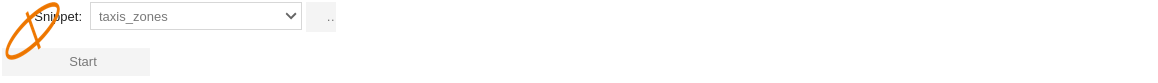

In [4]:
Constructor.widget('Taxis Borough', 0)

## Group by

# Scheduler added module(s): ['data_shape_1', 'sink_3']
# Scheduler deleted module(s): {'sink_3', 'data_shape_1'}


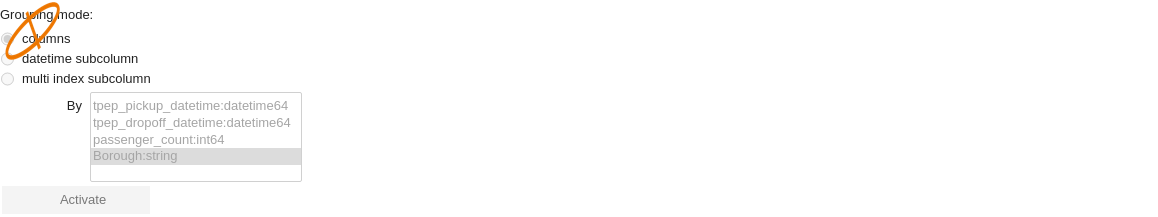

In [5]:
Constructor.widget('Group by', 0)

## Aggregate

# Scheduler added module(s): ['data_shape_1', 'sink_4']


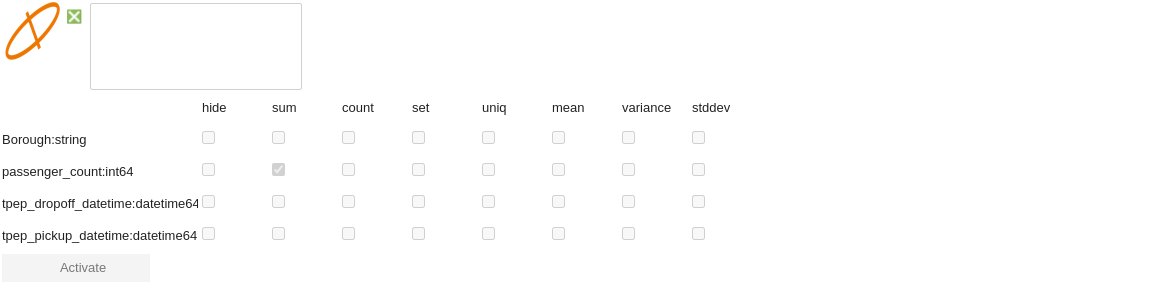

# Scheduler deleted module(s): {'sink_4', 'data_shape_1'}


In [6]:
Constructor.widget('Aggregate', 0)

## Any Vega

# Scheduler added module(s): ['data_shape_1', 'sink_5']


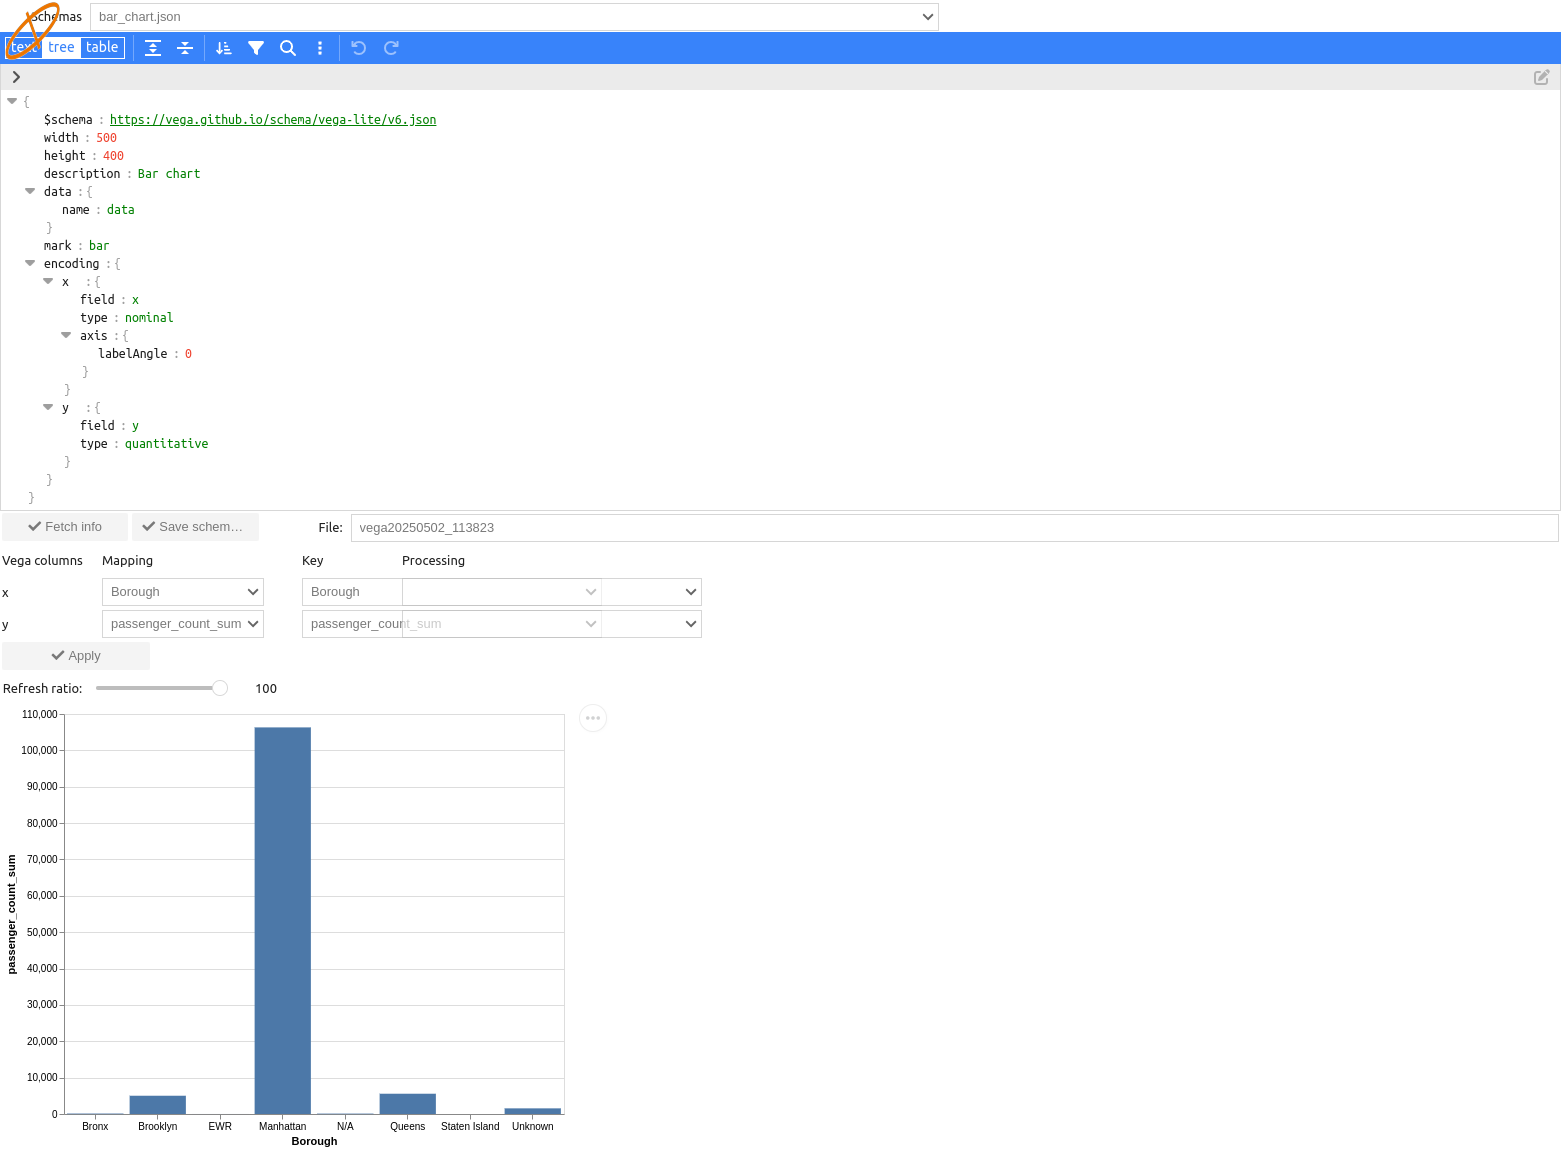

# Scheduler deleted module(s): {'data_shape_1', 'sink_5'}


In [7]:
Constructor.widget('Any Vega', 0)